# **Ejercicio de una red neuronal para clasificacion.**
Se utilizaran imagenes de numeros escritos a mano para poder reconocerlos



In [2]:
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 809.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 102.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 99.8 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorfl

In [3]:
!pip show tensorflow

Name: tensorflow
Version: 2.19.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tensorflow_decision_forests, tf_keras


In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [5]:
datos, metadatos = tfds.load("mnist", as_supervised=True, with_info=True)  #esto no solamente carga los datos del dataset, sino tambien los metadatos

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.BBZ1PM_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.BBZ1PM_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [6]:
metadatos #para ver los detalles de los datos importados

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/root/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year

En este caso, de reconocimiento de imagenes, se utilizaran numeros del 0 al 9, por lo que la caracteristica sera la imagen del numero escrito a mano y la etiqueta o salida sera su respectivo valor del 0 al 9

Se hace la separacion de los datos, el data set ya trae de por si 10000 conjuntos de prueba y 60000 de entrenamiento, por lo que solo se separan directamente sin tener que tratar los datos antes

In [7]:
datos_entrenamiento = datos["train"]
datos_pruebas = datos["test"]

Se obtienen las etiquetas, especificando "label" (etiqueta) y .names para obtener el nombre de cada etiqueta

In [8]:
nombres_clases = metadatos.features["label"].names
nombres_clases

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

En las imagenes, cada pixel esta representado por un byte (8 bits), por lo que cada pixel puede tener un valor de 0 a 255, donde 0 es completamente blanco y 255 es completamente negro.

Es necesario realizar una normalizacion, escalando los valores de 0-255 a 0-1, los algoritmos trabajan mejor si realizan los calculos con numeros pequeños, economiza costo computacional.

In [9]:
#Normalizacion
#0-255 1 byte
#Transformar 0-255 0-1 (0=0, 255=1, 127=.5)

#Normalizar datos ent y pruebas con una funcion
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes = imagenes/255   #se divide cada pixel por 255
  return imagenes, etiquetas

datos_entrenamiento = datos_entrenamiento.map(normalizar) #El método map en TensorFlow se utiliza para aplicar una función a cada elemento de un conjunto de datos.
datos_pruebas = datos_pruebas.map(normalizar)

#Agregar en cache
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

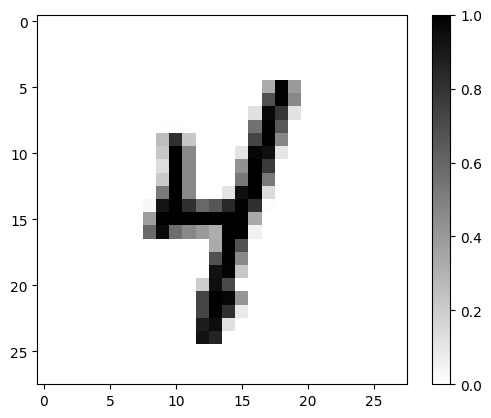

In [10]:
for imagen, etiqueta in datos_entrenamiento.take(1):
  break

import matplotlib.pyplot as plt

#Mostrarlo en pantalla
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.show()

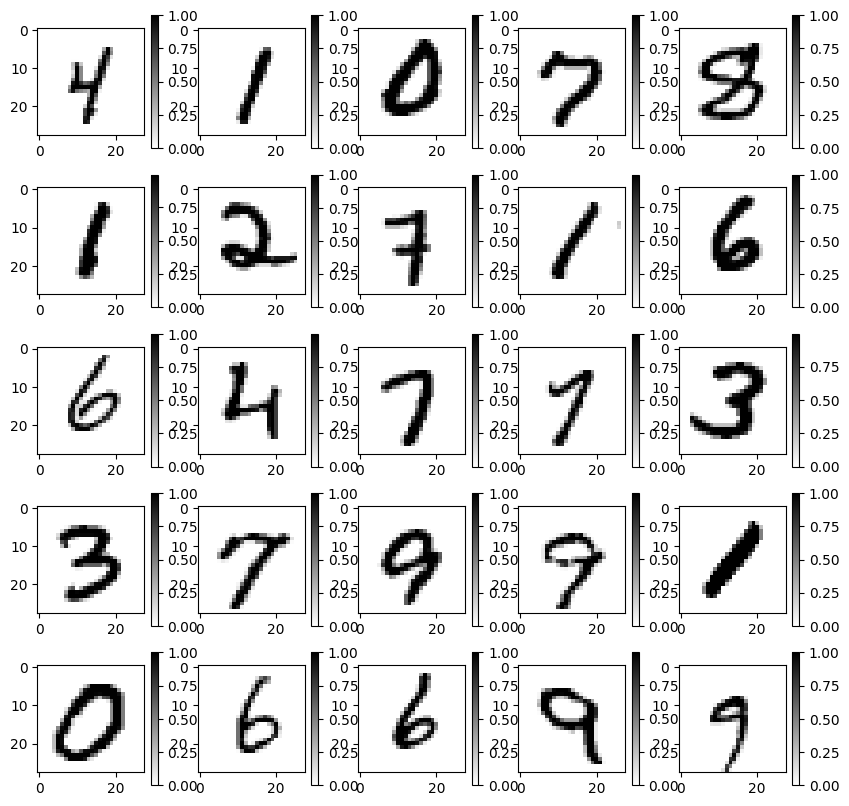

In [11]:
plt.figure(figsize=(10,10))

for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  #Mostrarlo en pantalla
  plt.subplot(5,5, i+1)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.colorbar()

plt.show()

para introducir una imagen en una red neuronal, se separan en columnas los pixeles y se van apilando uno bajo otro para formar una unica columna o arreglo, en el ejemplo que tiene 28x28 pixeles, se tendra una columna de 784 datos. Estos datos seran las entradas.

Cuando se tienen datos en forma distinta, a diferencia de tener ya lso datos en forma de vectores, se utiliza el metodo .flatten indicando la forma del set de datos.

In [12]:
modelo = tf.keras.Sequential([
    #capa de entrada
    tf.keras.layers.Flatten(input_shape=(28,28,1)), # se especifica la forma del set de datos (28x28 pixeles y 1 es que solo tiene color negro, si es rgb es 3)

    #capa del medio o capa oculta

      #para las siguientes capas ocultas, no tienen funcion de activacion, son lineales, se puede agregar funcion de activacion .relu
    #tf.keras.layers.Dense(50), # dos capas de 50 neuronas
    #tf.keras.layers.Dense(50),  #no siempre pasa, pero cuando hay muchos datos, tener mas capas y consecuentemente tener mas parametros ajustables, hace que las redes funcionen mejor

    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),

    #capa de salida
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) #aqui se especifica en cuantas opciones distintas se clasificaran los datos (0-9) y la funcion de activacion
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
modelo.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),  #esto se utiliza asi a diferencia de ejercicio de NN regresion ya que se hace una clasificacion no una regresion
    metrics=["accuracy"]  #para que durante el entrenamiento tambien muestre la exactitud del modelo
)

In [14]:
TAM_LOTE = 32 # el procesamiento se hara en lotes de 32 en 32

datos_entrenamiento = datos_entrenamiento.repeat().shuffle(60000).batch(TAM_LOTE)      #repeat para que una vez que termine de realizar una vuelta vuelva a empezar, shuffle para que reorganice de manera aleatoria espec la cant de datos, batch para que lo haga en lotes
datos_pruebas = datos_pruebas.batch(TAM_LOTE) #aqui separa los datos de pruebas en lotes de 32

entrenamiento

In [15]:
import math

train = modelo.fit(
    datos_entrenamiento, epochs=10,   #nro de epocas bajodebido a que son muchos datos
    steps_per_epoch=math.ceil(60000/TAM_LOTE) #esto se hace cuando se trabaja con lotes
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8452 - loss: 0.5286
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9565 - loss: 0.1463
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9700 - loss: 0.1027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9736 - loss: 0.0841
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9771 - loss: 0.0741
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9807 - loss: 0.0619
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9833 - loss: 0.0538
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9858 - loss: 0.0464
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9862 - loss: 0.0408
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9891 - loss: 0.0338


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Etiqueta real: 0
Predicción del modelo: 0


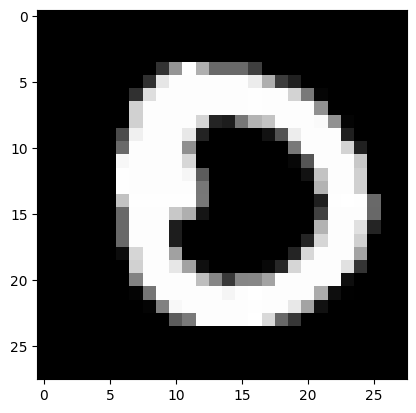

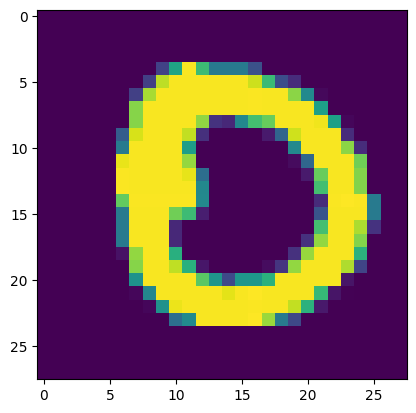

In [29]:
import numpy as np

# Obtén un lote de datos de prueba
lote_de_prueba = next(iter(datos_pruebas))  #mediante el iterador y next obtiene el primer lote de 32 (datos de pruebas ya se separo en lotes previamente)

# Selecciona una imagen aleatoria del lote
random_image_i = np.random.randint(0, TAM_LOTE)

# Extrae la imagen y la etiqueta correspondiente
imagen_aleatoria = lote_de_prueba[0][random_image_i].numpy()    #obtiene los arreglos con valores normalizados en float32 de las imagenes
etiqueta_aleatoria = lote_de_prueba[1][random_image_i].numpy()  #obtiene la etiqueta asociada con esa imagen

# Realiza la predicción con tu modelo
prediccion = modelo.predict(np.expand_dims(imagen_aleatoria, axis=0)) #axis controla la posición a lo largo de la cual se agrega la nueva dimensión, y su valor debe ser un número entero que indique el eje deseado. En el caso de axis=0, se agrega la nueva dimensión al principio del arreglo
  #si el arreglo es unidimensional, solo existe el eje 0
#Si el modelo espera lotes de imágenes y imagen_aleatoria es solo UNA imagen, es común utilizar np.expand_dims para simular un lote de tamaño 1, incluso si es una única imagen.

# Imprime la imagen y la etiqueta
print(f'Etiqueta real: {etiqueta_aleatoria}')
print(f'Predicción del modelo: {np.argmax(prediccion)}')

# prediccion: Es el resultado de la predicción realizado por el modelo. En el contexto de un problema de clasificación, este array probablemente contenga las probabilidades
# asociadas a cada clase. Por ejemplo, si estás clasificando dígitos escritos a mano, podrías tener algo así como [0.1, 0.8, 0.05, 0.02, 0.03, 0.01, 0.05, 0.001, 0.02, 0.009].
# Cada valor representa la probabilidad de que la imagen dada pertenezca a la clase correspondiente (en este caso, del dígito 0 al 9).
# np.argmax(prediccion): np.argmax es una función de NumPy que devuelve el índice del valor máximo en el array. En otras palabras, devuelve la posición del mayor valor en el array.

# Puedes visualizar la imagen si lo deseas
import matplotlib.pyplot as plt

plt.imshow(imagen_aleatoria.reshape(28, 28), cmap='gray')
plt.show()

plt.imshow(imagen_aleatoria.reshape(28, 28))
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


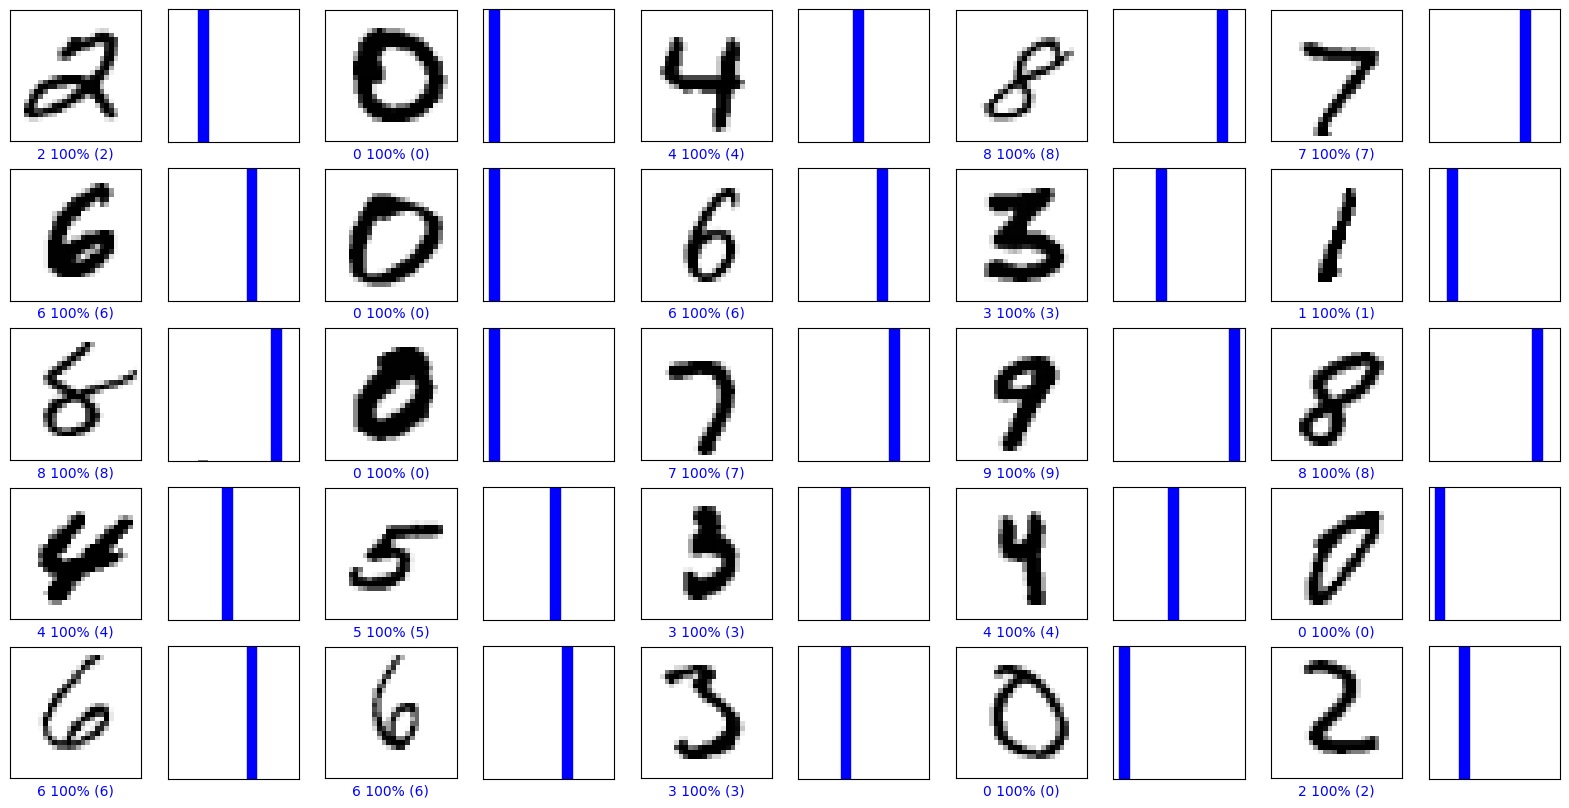

In [30]:
#Pintar una cuadricula con varias predicciones, y marcar si fue correcta (azul) o incorrecta (roja)
import numpy as np

for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)

def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                100*np.max(arr_predicciones),
                                nombres_clases[etiqueta_real]),
                                color=color)

def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica = plt.bar(range(10), arr_predicciones, color="#777777")
  plt.ylim([0, 1])
  etiqueta_prediccion = np.argmax(arr_predicciones)

  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('blue')

filas = 5
columnas = 5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
  plt.subplot(filas, 2*columnas, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(filas, 2*columnas, 2*i+2)
  graficar_valor_arreglo(i, predicciones, etiquetas_prueba)

In [31]:
!pwd

/content


# Guardar el modelo y exportarlo

El modelo entrenado se puede guardar para utilizarlo en un codigo sin tener que entrenar la red cada vez que se quiera utilizar

In [33]:
modelo.save("numbers.keras")

In [ ]:
modelo.save("numbers.h5")

# Importar imagen propia

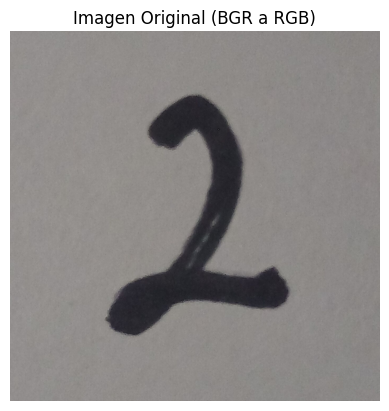

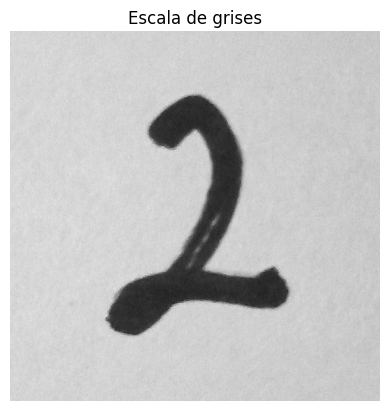

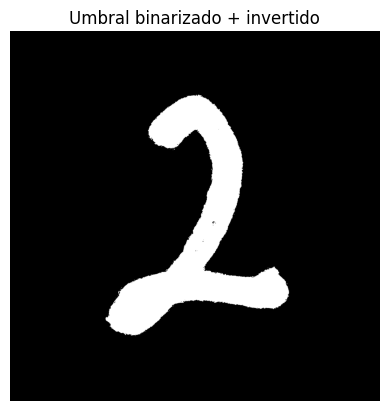

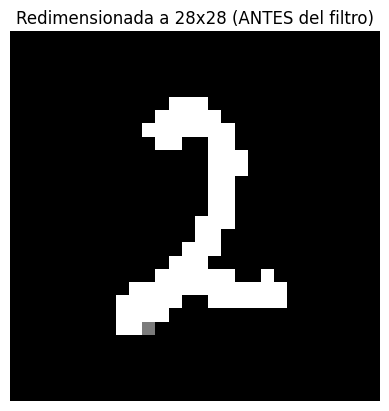

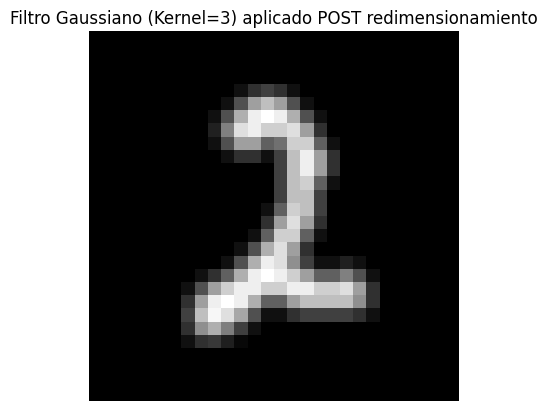

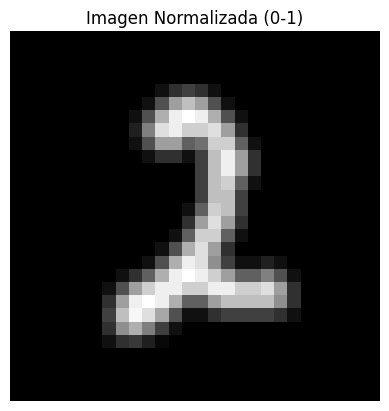

number shape: (28, 28)  rango: 0.0 1.0


In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Cargar imagen ---
ruta_imagen = "/content/2.jpg"  # Cambia por la ruta real
imagen_bgr = cv2.imread(ruta_imagen)

if imagen_bgr is None:
    print("No se pudo cargar la imagen. Verifica la ruta.")
    exit()

# --- Mostrar Original ---
plt.figure()
plt.title("Imagen Original (BGR a RGB)")
plt.imshow(cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# --- Convertir a escala de grises ---
imagen_gray = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.title("Escala de grises")
plt.imshow(imagen_gray, cmap='gray')
plt.axis('off')
plt.show()

# --- Umbral para binarizar ---
_, imagen_thresh = cv2.threshold(imagen_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.figure()
plt.title("Umbral binarizado + invertido")
plt.imshow(imagen_thresh, cmap='gray')
plt.axis('off')
plt.show()

# --- PRIMERO Redimensionar ---
imagen_redimensionada = cv2.resize(imagen_thresh, (28, 28))
plt.figure()
plt.title("Redimensionada a 28x28 (ANTES del filtro)")
plt.imshow(imagen_redimensionada, cmap='gray')
plt.axis('off')
plt.show()

# --- LUEGO Filtro Gaussiano ---
tamaño_kernel = 3  # Reducido porque la imagen ahora es más pequeña (28x28)
imagen_filtrada = cv2.GaussianBlur(imagen_redimensionada, (tamaño_kernel, tamaño_kernel), 0)
plt.figure()
plt.title(f"Filtro Gaussiano (Kernel={tamaño_kernel}) aplicado POST redimensionamiento")
plt.imshow(imagen_filtrada, cmap='gray')
plt.axis('off')
plt.show()

# --- Normalizar ---
number = imagen_filtrada.astype('float32') / 255.0
plt.figure()
plt.title("Imagen Normalizada (0-1)")
plt.imshow(number, cmap='gray')
plt.axis('off')
plt.show()

# --- Info final ---
print("number shape:", number.shape, " rango:", np.min(number), np.max(number))

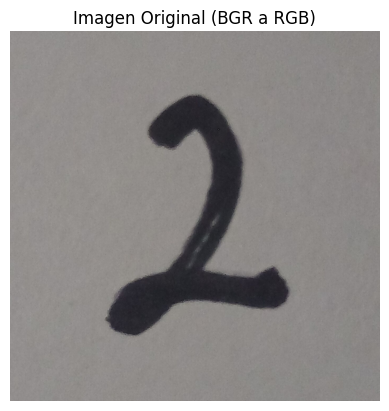

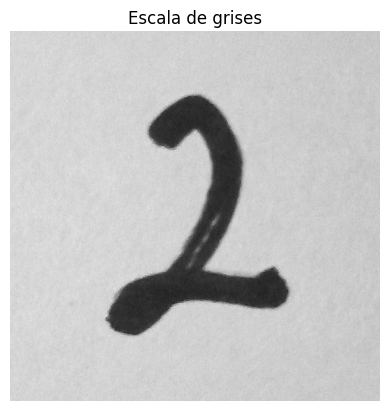

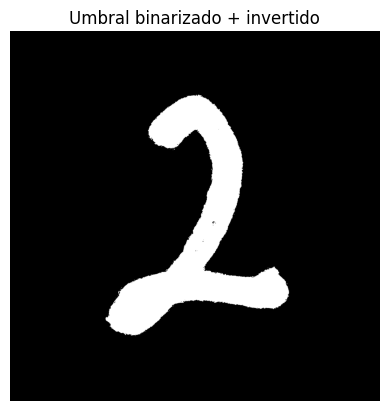

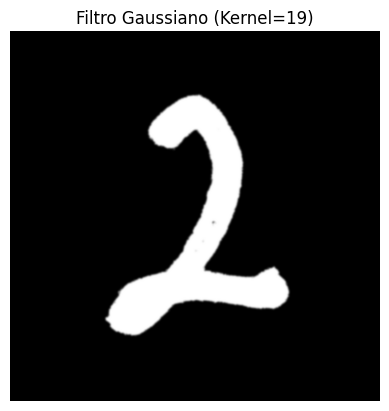

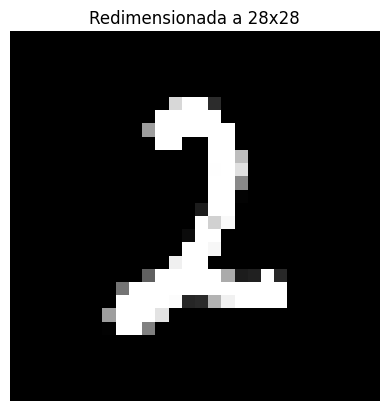

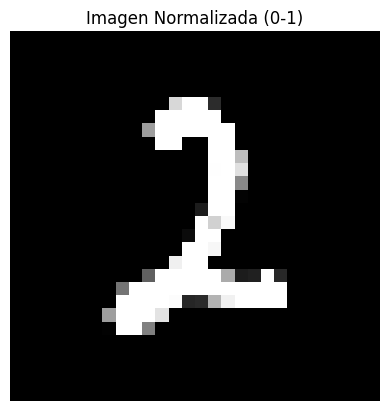

number shape: (28, 28)  rango: 0.0 1.0


In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Cargar imagen ---
ruta_imagen = "/content/2.jpg"  # Cambia por la ruta real
imagen_bgr = cv2.imread(ruta_imagen)

if imagen_bgr is None:
    print("No se pudo cargar la imagen. Verifica la ruta.")
    exit()

# --- Mostrar Original ---
plt.figure()
plt.title("Imagen Original (BGR a RGB)")
plt.imshow(cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# --- Convertir a escala de grises ---
imagen_gray = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.title("Escala de grises")
plt.imshow(imagen_gray, cmap='gray')
plt.axis('off')
plt.show()

# --- Umbral para binarizar ---
_, imagen_thresh = cv2.threshold(imagen_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.figure()
plt.title("Umbral binarizado + invertido")
plt.imshow(imagen_thresh, cmap='gray')
plt.axis('off')
plt.show()

# --- Filtro Gaussiano ---
tamaño_kernel = 19
imagen_filtrada = cv2.GaussianBlur(imagen_thresh, (tamaño_kernel, tamaño_kernel), 0)
plt.figure()
plt.title(f"Filtro Gaussiano (Kernel={tamaño_kernel})")
plt.imshow(imagen_filtrada, cmap='gray')
plt.axis('off')
plt.show()

# --- Redimensionar ---
imagen_redimensionada = cv2.resize(imagen_filtrada, (28, 28))
plt.figure()
plt.title("Redimensionada a 28x28")
plt.imshow(imagen_redimensionada, cmap='gray')
plt.axis('off')
plt.show()

# --- Normalizar ---
number = imagen_redimensionada.astype('float32') / 255.0
plt.figure()
plt.title("Imagen Normalizada (0-1)")
plt.imshow(number, cmap='gray')
plt.axis('off')
plt.show()

# --- Info final ---
print("number shape:", number.shape, " rango:", np.min(number), np.max(number))


# Usar el modelo entrenado para detectar el digito


🔎 Imagen:
   Dígito: 2 | Confianza: 100.0%
   Probabilidades: ['0.0000', '0.0000', '0.9999', '0.0000', '0.0000', '0.0000', '0.0000', '0.0001', '0.0000', '0.0000']


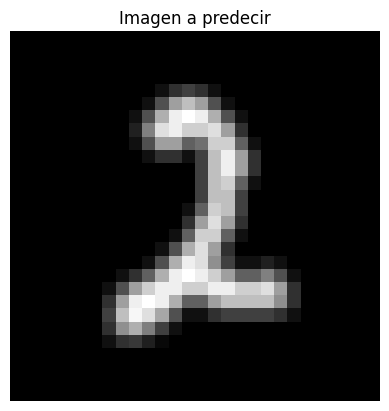

In [51]:
import numpy as np

# --- Función de preparación ---
def preparar_entrada(imagen):
    """Convierte (28,28) -> (1,28,28,1)"""
    return np.expand_dims(np.expand_dims(imagen, axis=-1), axis=0)

# --- Predicciones ---
# Prepara las entradas
imagen_input = preparar_entrada(number)       # (1, 28, 28, 1)

# Predice (verbose=0 para silenciar output)
prediction = modelo.predict(imagen_input, verbose=0)

# --- Resultados claros ---
def interpretar_prediccion(pred, nombre_imagen):
    digito = np.argmax(pred)
    confianza = pred[0][digito]
    print(f"\n🔎 {nombre_imagen}:")
    print(f"   Dígito: {digito} | Confianza: {confianza*100:.1f}%")
    print(f"   Probabilidades: {[f'{p:.4f}' for p in pred[0]]}")

interpretar_prediccion(prediction, "Imagen")

# Mostrar la imagen
plt.imshow(number, cmap='gray')
plt.title("Imagen a predecir")
plt.axis('off')  # Opcional, para quitar ejes
plt.show()